<a href="https://colab.research.google.com/github/shubham-maral/Bike_Sharing_Demand_Prediction_Capstone_Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

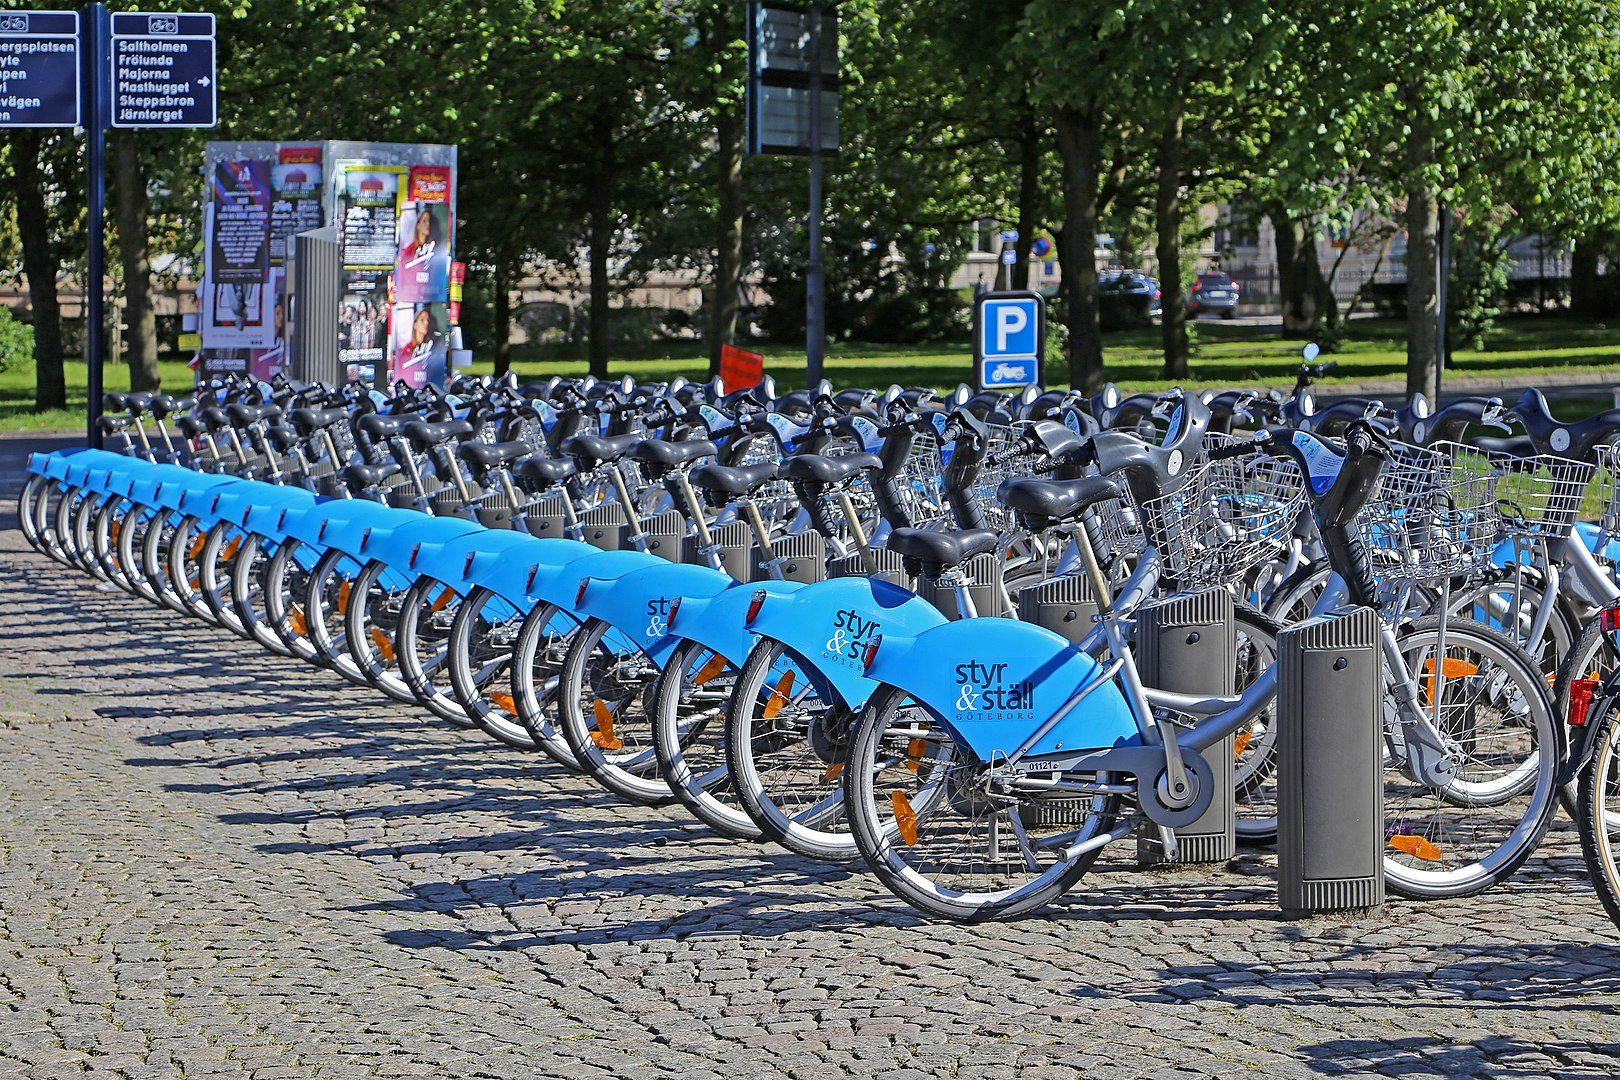

## <b> Problem Statement </b>

### In numerous urban centers, rental bikes have been introduced to improve the convenience of mobility. Ensuring the timely availability and accessibility of rental bikes is of paramount importance as it reduces waiting times. Consequently, ensuring a consistent supply of rental bikes to the city is a significant challenge. The key aspect of this challenge is predicting the number of bikes needed for stable rental bike supply at each hour.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date - year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature -Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility 10m - m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [10]:
# importing libraries

import pandas as pd

import numpy as np
from numpy import math
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
import plotly.express as px

from datetime import datetime
from datetime import date

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import neighbors
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import (Lasso, Ridge,
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [11]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# loading dataset
df = pd.read_csv('/content/SeoulBikeData.csv', encoding = 'ISO-8859-1')

##Exploring Data

In [13]:
# top 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [14]:
# last 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [15]:
# shape of dataset
df.shape

(8760, 14)

In [16]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

#Data preprocessing

## Steps of data processing
1. Deal with null/missing values
2. Deal with duplicate data
3. Deal with outliers

##1. Deal with null/missing values

In [17]:
# Checking null/missing values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* No null or missing values in dataset


Create a summary table for columns

In [18]:
# Create a summary table for column information
column_info = {
    'Column': df.columns,
    'Dtype': df.dtypes,
    'nUnique': df.nunique(),
    'Unique': df.apply(lambda x: x.unique())
}

# Create a DataFrame from the summary information
df_columns = pd.DataFrame(column_info)

# Add indexing
df_columns = df_columns.reset_index(drop=True)

df_columns

Column    Dtype  nUnique  \
0                        Date   object      365   
1           Rented Bike Count    int64     2166   
2                        Hour    int64       24   
3             Temperature(°C)  float64      546   
4                 Humidity(%)    int64       90   
5            Wind speed (m/s)  float64       65   
6            Visibility (10m)    int64     1789   
7   Dew point temperature(°C)  float64      556   
8     Solar Radiation (MJ/m2)  float64      345   
9                Rainfall(mm)  float64       61   
10              Snowfall (cm)  float64       51   
11                    Seasons   object        4   
12                    Holiday   object        2   
13            Functioning Day   object        2   

                                               Unique  
0   [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...  
1   [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...  
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
3   [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....  
4   [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...  
5   [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...  
6   [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...  
7   [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...  
8   [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...  
9   [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...  
10  [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...  
11                   [Winter, Spring, Summer, Autumn]  
12                              [No Holiday, Holiday]  
13                                          [Yes, No]

##2. Deal with duplicate data

In [19]:
# we are going to find out, how many duplicate rows are their.
df[df.duplicated()].shape

(0, 14)

* No duplicate data is present in dataset

##3. Deal with outliers

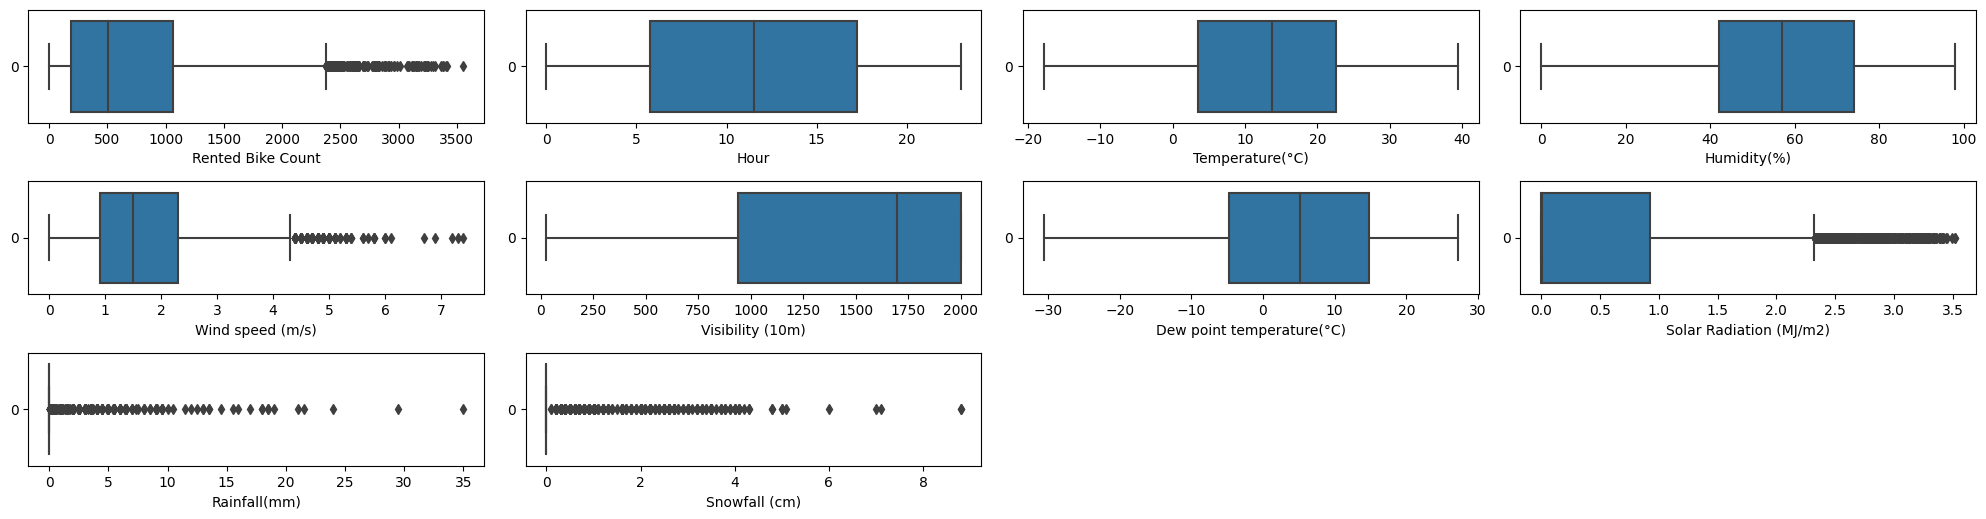

In [20]:
# looking for outliers of every fearture of dataset with the help of boxplot
plt.figure(figsize = (20, 10))

num_it = 1
for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col], orient='h')
    plt.xlabel(col)
    num_it+=1

plt.tight_layout()


* Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values which are acceptable.
* We need to deal with **Rented Bike count** **outliers.**

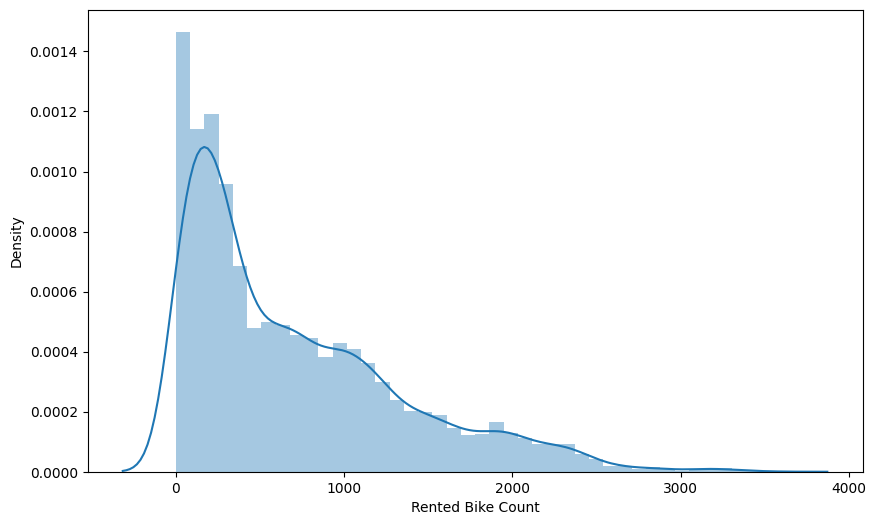

In [21]:
# Rented bike count (target variable) distribution graph
ax= sns.distplot(df['Rented Bike Count'])

* Rented bike count column follow **right tail distribution**.



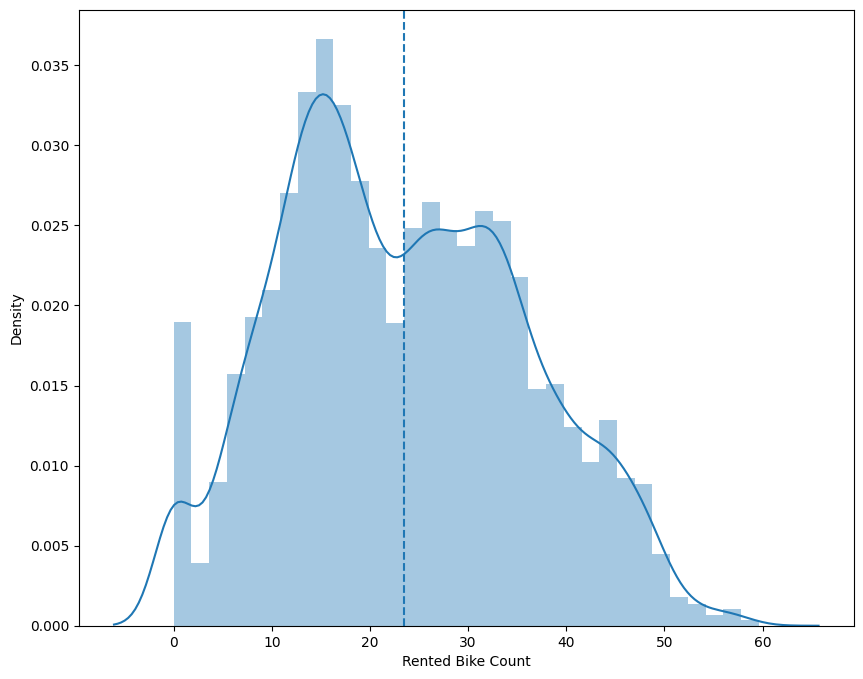

In [22]:
# square_root transformation
plt.figure(figsize=(10,8))
ax=sns.distplot(np.sqrt(df['Rented Bike Count']))
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), linestyle='dashed')

 * After doing square root of Rented Bike Count, it follows normal distribution.

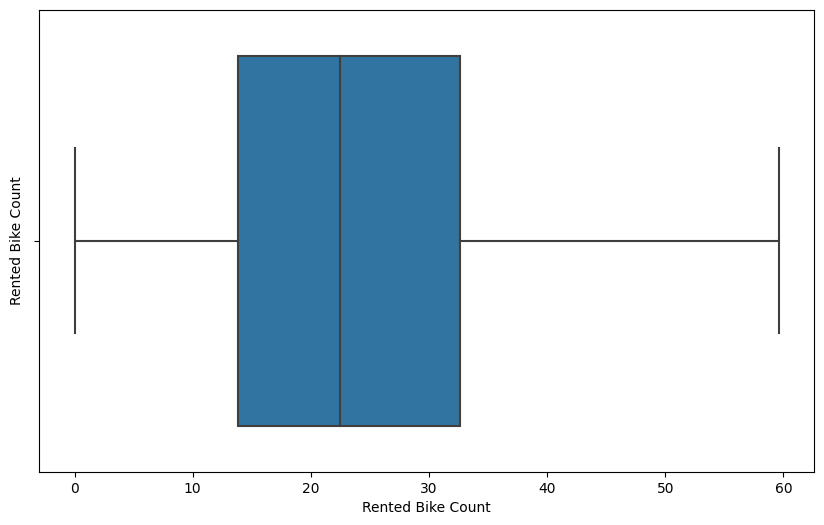

In [23]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

* **after doing squareroot of Rented Bike Count no outliers detected**

#Feature Engineering

##1. Deal with wrong datatype

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* Total 14 features present in dataset where **Date column should be datetime dtype.**

In [25]:
# Date column's datatype conversion

df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

* **Date column converted to datetime datatype.**

##2. Deal with multicollinearity

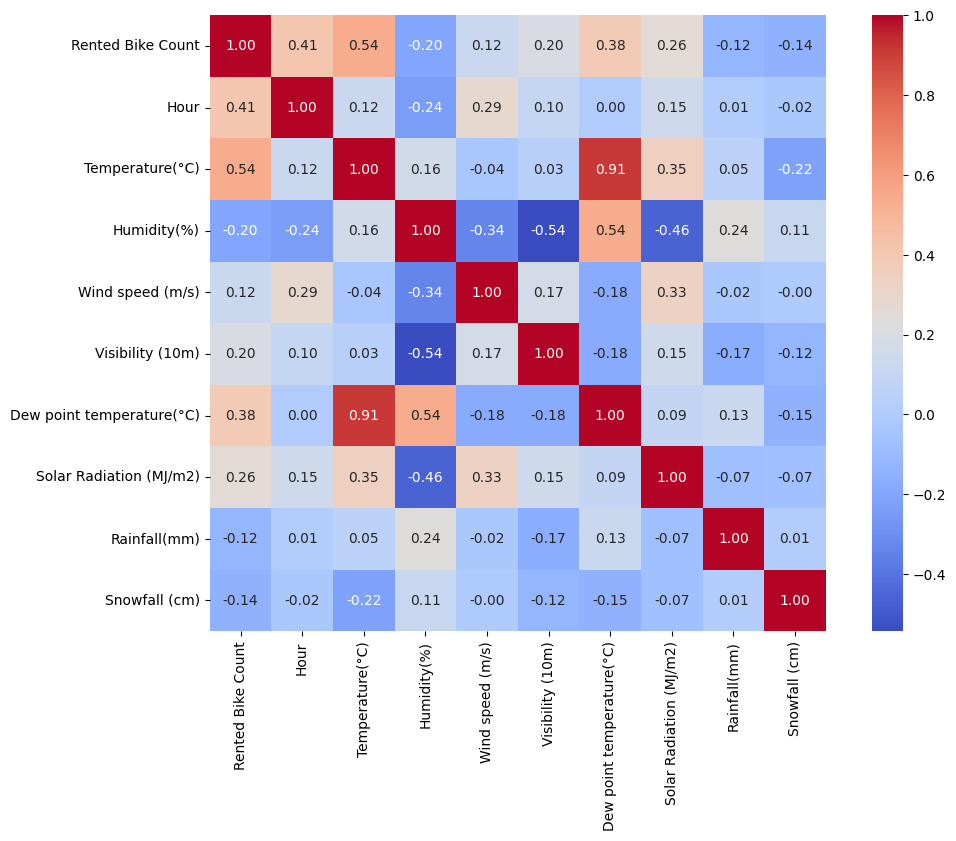

In [26]:
# ploting heat map for finding correlation between columns
hdf = df.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(hdf,annot = True, fmt='.2f', square=True, cmap='coolwarm');

* Dew point temperature and Temperature are highly correlated



In [27]:
# droping Dew point temperature(°C) column
df.drop(['Dew point temperature(°C)'], axis = 1, inplace = True)

In [28]:
# Checking Multicollinearity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
    Function to calculate VIF
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)


In [29]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count'] ]])

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

* Values of VIF's are less than 5 which is acceptable, there is less chances of multicollinearity

##3. Extracting day, month, and day of week from Date column.

In [30]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

# EDA (Exploratory Data Analysis)

##1. Univariate analysis

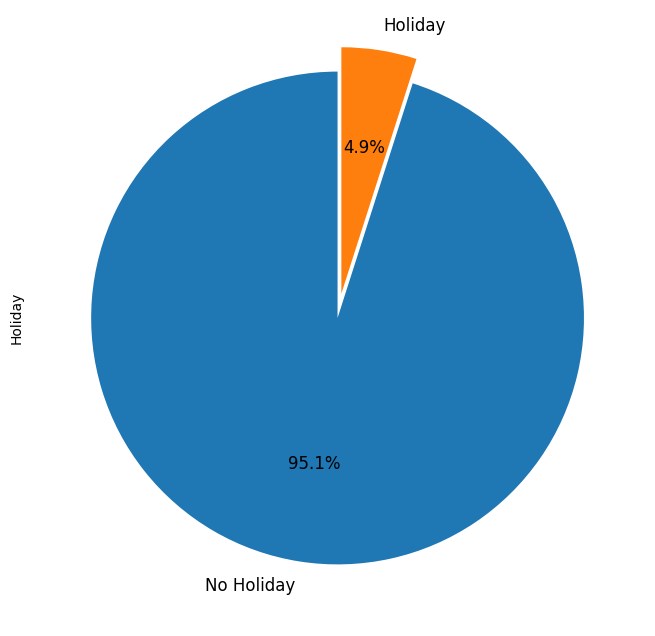

In [31]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Create a pie chart
df['Holiday'].value_counts().plot(kind='pie', explode=(0, 0.1),
                                  autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.show()

* According to the pie chart, 95.1% of the data represent working day and only 4.9% of the data represent holiday.

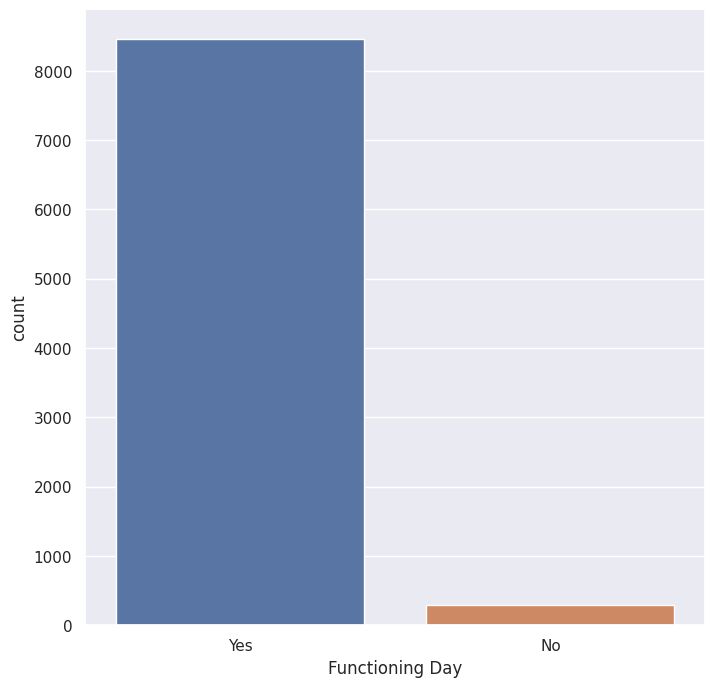

In [32]:
# Create a count plot of 'Functioning Day'
plt.figure(figsize=(8, 8))
sns.set_theme()
sns.countplot(data=df, x='Functioning Day')

# Show the plot
plt.show()

* very less non-functioning day in comparison of functioning day

In [33]:
#checking counts of functioning day
print(df['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [34]:
# Numeric Feature
numeric_features= df.select_dtypes(exclude='object')
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   int64  
 10  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 752.9 KB


In [35]:
# describing numeric feature
numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count        8760.0   704.602055  644.997468   0.0  191.00   
Hour                     8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)          8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)              8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)         8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)         8760.0  1436.825799  608.298712  27.0  940.00   
Solar Radiation (MJ/m2)  8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)             8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)            8760.0     0.075068    0.436746   0.0    0.00   
month                    8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend         8760.0     0.290411    0.453978   0.0    0.00   

                             50%      75%      max  
Rented Bike Count         504.50  1065.25  3556.00  
Hour                       11.50    17.25    23.00  
Temperature(°C)            13.70    22.50    39.40  
Humidity(%)                57.00    74.00    98.00  
Wind speed (m/s)            1.50     2.30     7.40  
Visibility (10m)         1698.00  2000.00  2000.00  
Solar Radiation (MJ/m2)     0.01     0.93     3.52  
Rainfall(mm)                0.00     0.00    35.00  
Snowfall (cm)               0.00     0.00     8.80  
month                       7.00    10.00    12.00  
weekdays_weekend            0.00     1.00     1.00

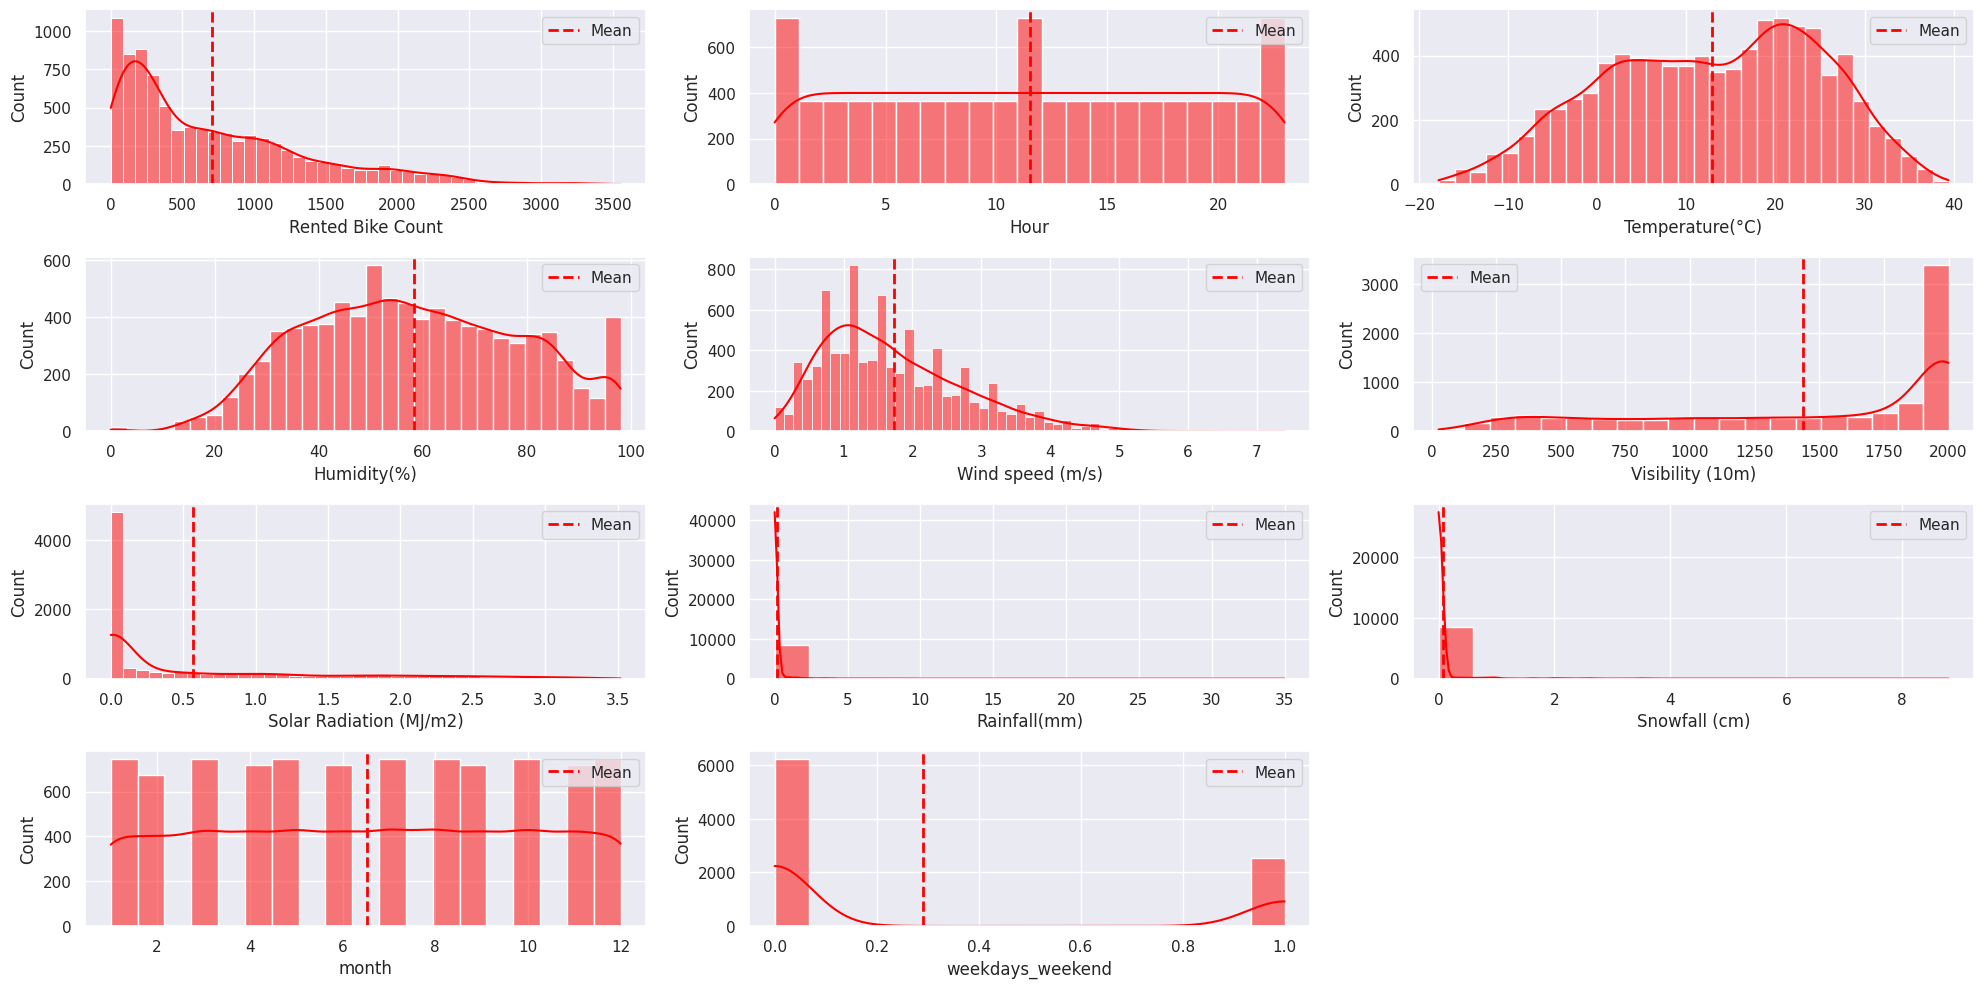

In [36]:
# Set the figure size
plt.figure(figsize=(20, 12))

for i, col in enumerate(numeric_features.describe().columns, start=1):
    plt.subplot(5, 3, i)

    # Create a histogram with KDE and mean line
    sns.histplot(df[col], color='red', kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.xlabel(col)
    plt.legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


##2. Bivariate Analysis

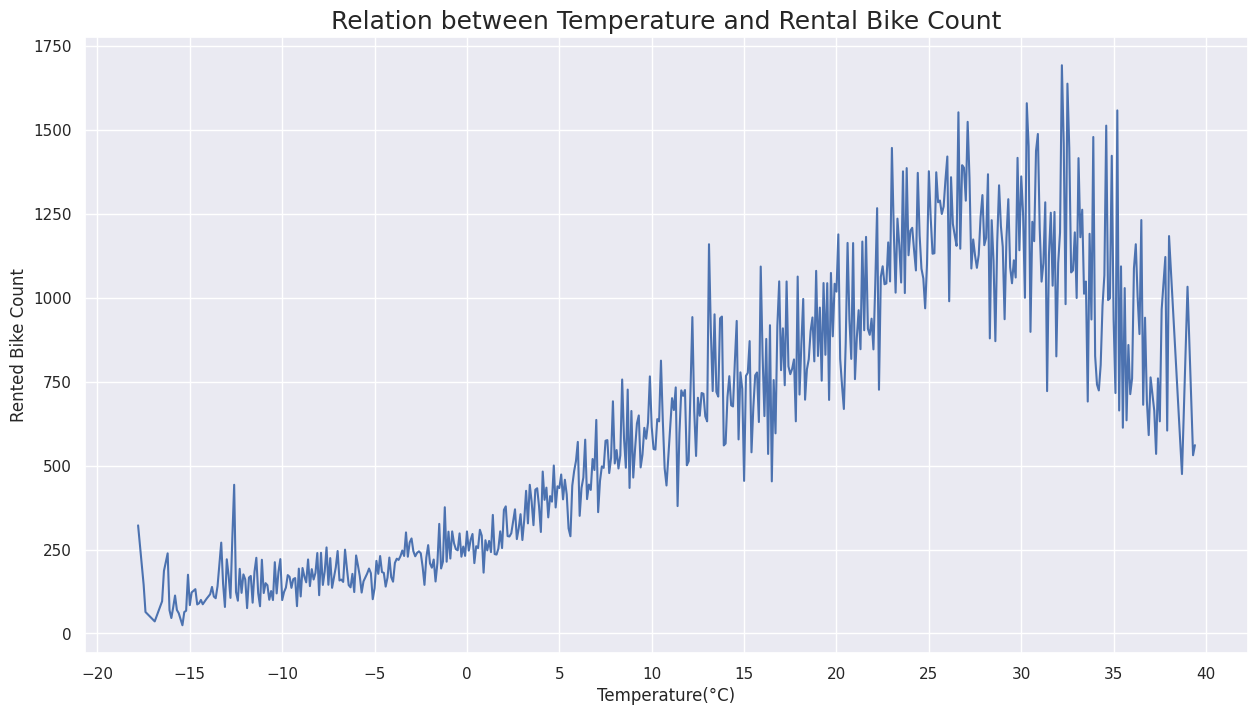

In [37]:
# Grouping by 'Temperature(°C)' and calculating the mean of 'Rented Bike Count'
df_t = df.groupby('Temperature(°C)').agg({'Rented Bike Count': 'mean'}).reset_index()

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a line plot
sns.lineplot(data=df_t, x='Temperature(°C)', y='Rented Bike Count')

# Customize the x-axis ticks
plt.xticks(np.arange(-20, 45, 5))

# Set labels and title
plt.xlabel('Temperature(°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count', fontsize=18)

# Show the plot
plt.show()

* According to the line chart, highest demand for the rented bike is seen when there is moderate temperature that is around 25°C to 35°C.

Text(0.5, 1.0, 'Count of Rented bikes acording to Month')

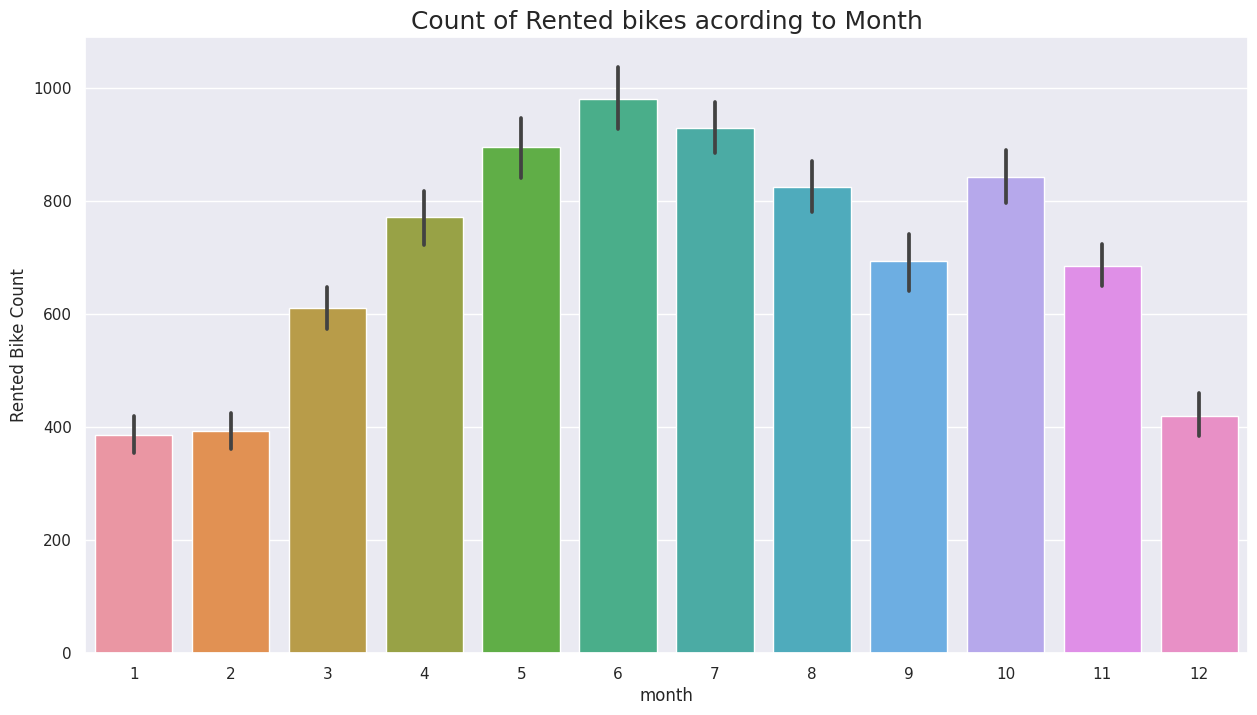

In [38]:
# Count of Rented bikes acording to Month
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='month', y='Rented Bike Count')
plt.title('Count of Rented bikes acording to Month', fontsize=18)

* From the above bar plot we can clearly say that in **month of June, there is high demand** for rental bikes.
* The **least demand** of rented bikes is seen in the months of **January and February.**

Text(0.5, 1.0, 'Count of Rented bikes per Hour of a day')

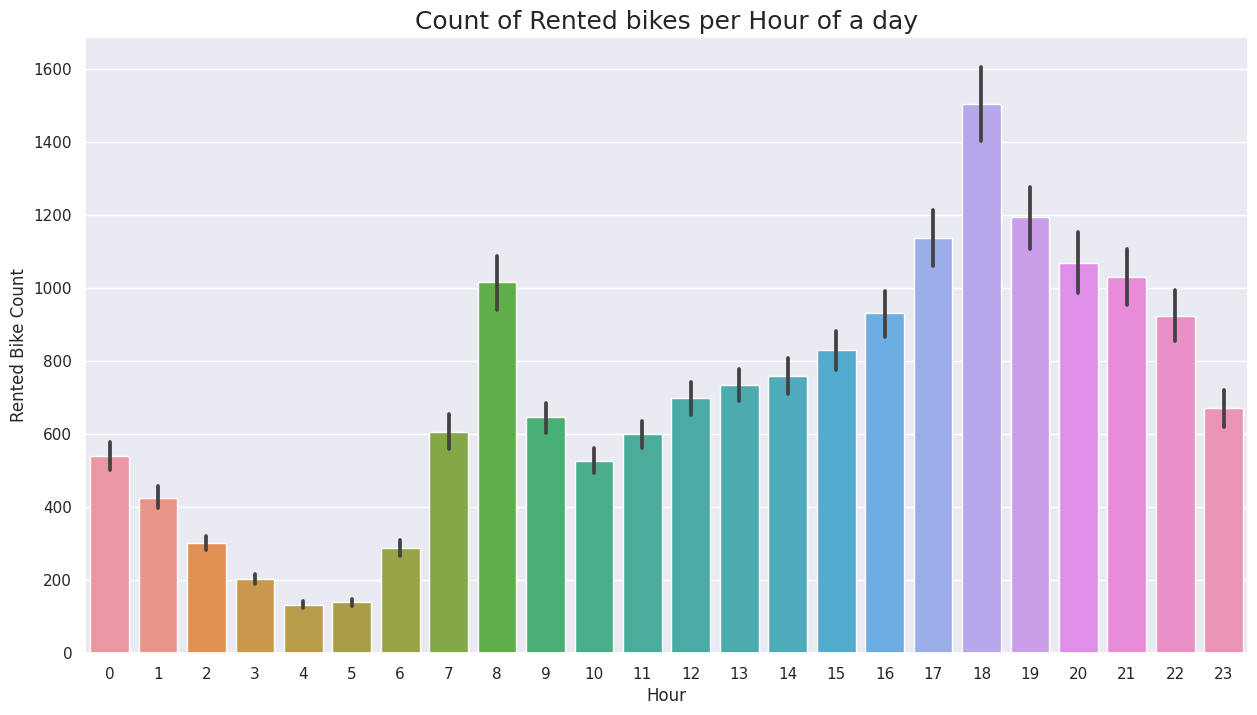

In [39]:
# Count of Rented bikes per Hour of a day
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Hour', y='Rented Bike Count')
plt.title('Count of Rented bikes per Hour of a day', fontsize=18)

* it can be seen that generally people use rented bikes during their working hour from **7am to 9am and 5pm to 7pm.**

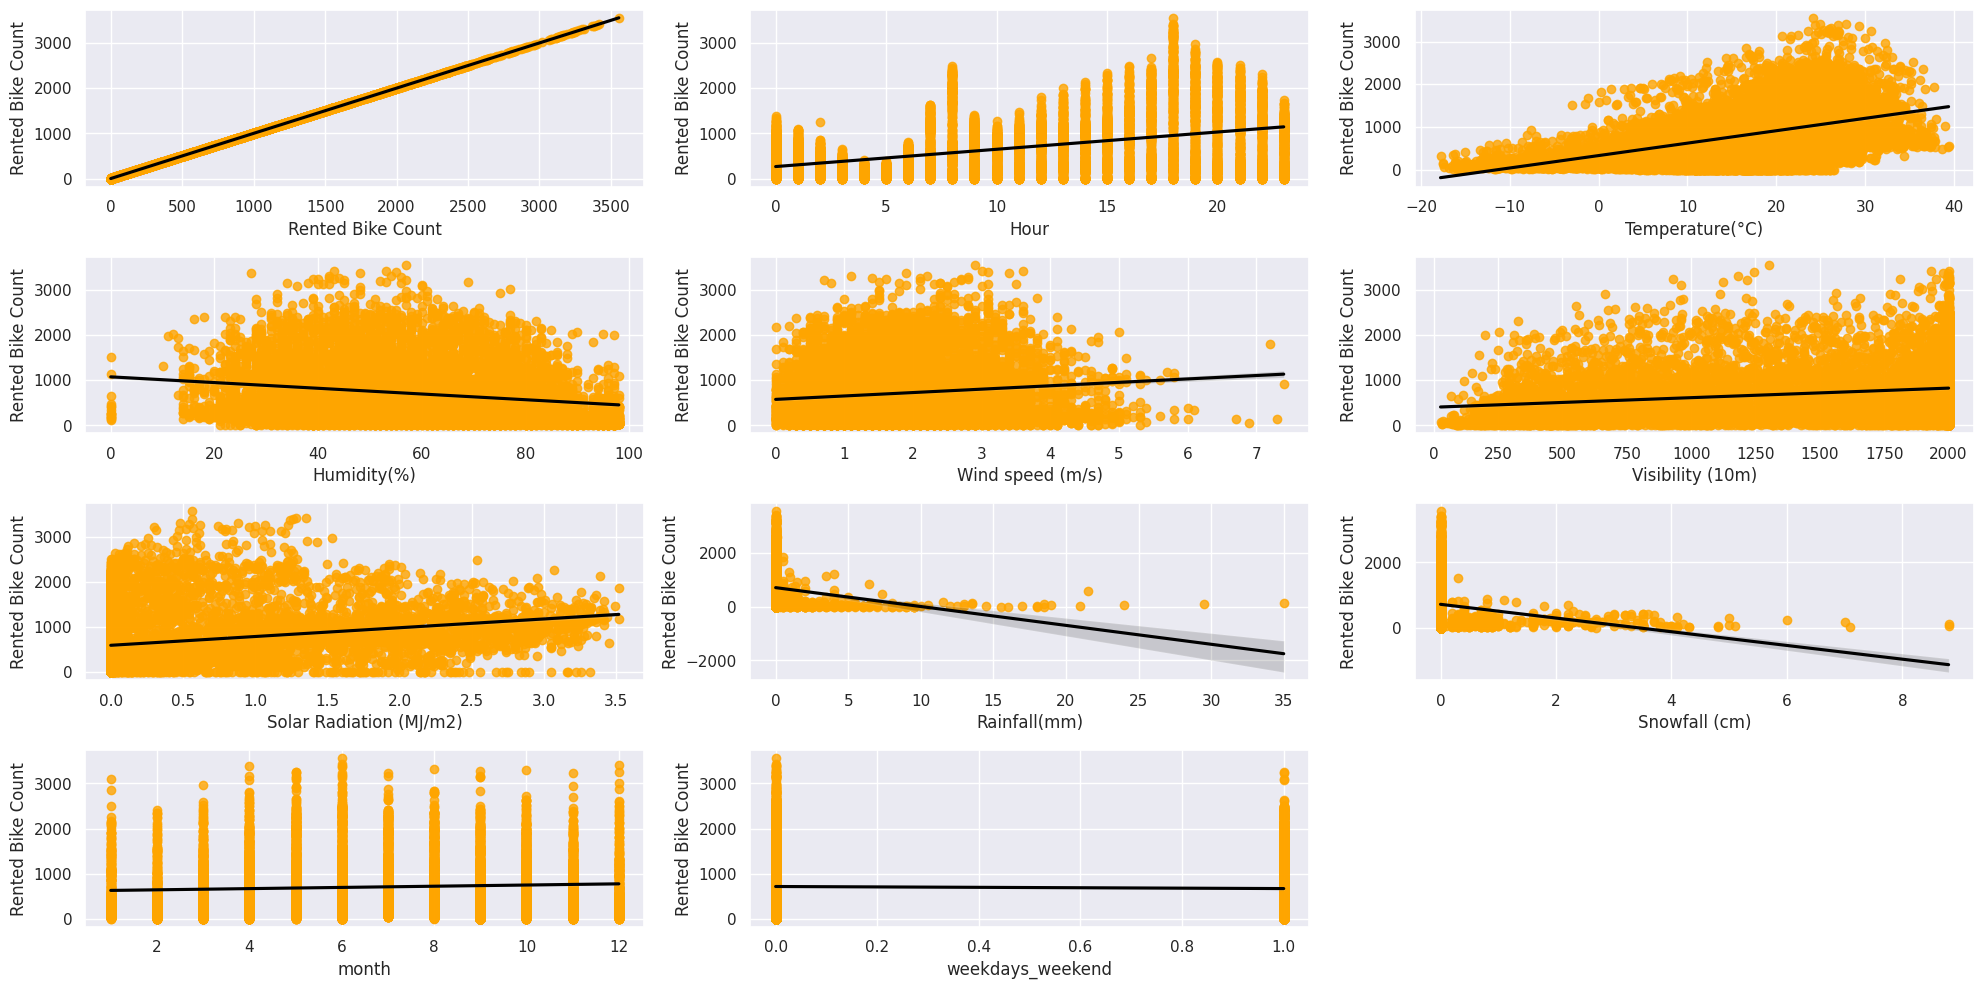

In [40]:
#Regression plots of all the numerical features

plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_features.describe().columns, start=1):
    plt.subplot(5, 3, i)
    sns.regplot(x=df[col],y=df['Rented Bike Count'],
                scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
    plt.xlabel(col)

plt.tight_layout()
plt.show()


* According to above plots, **High temperature** leads to **increase in Rented Bike Count per hour**

In [41]:
#Extract categorical features
categorical_features= df.select_dtypes(include='object')
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

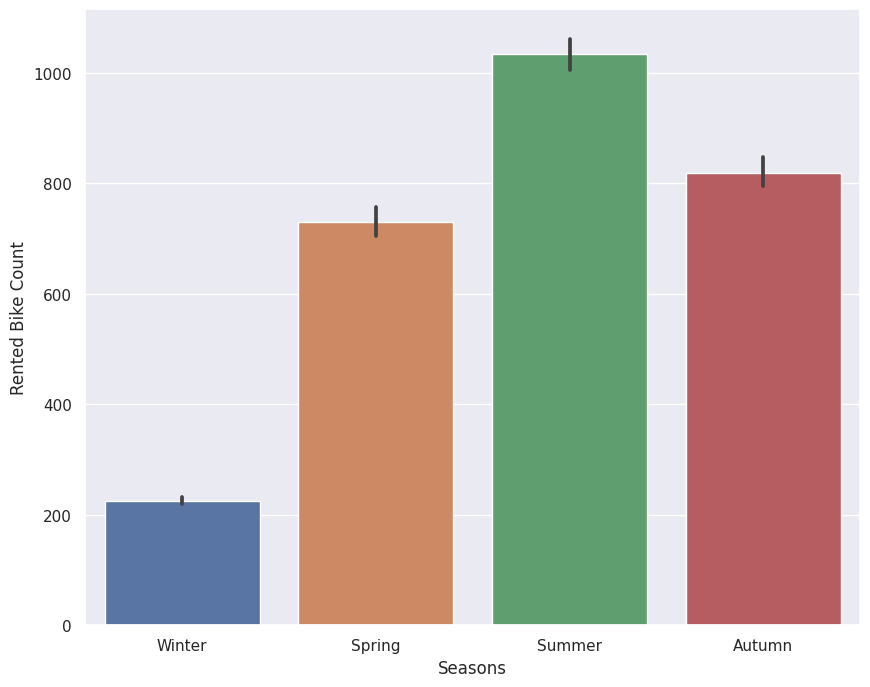

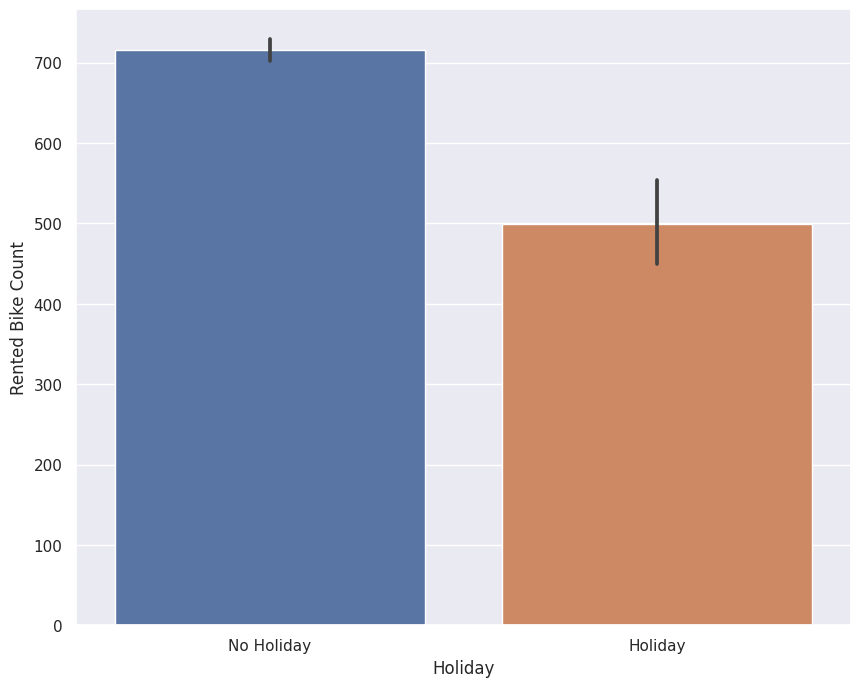

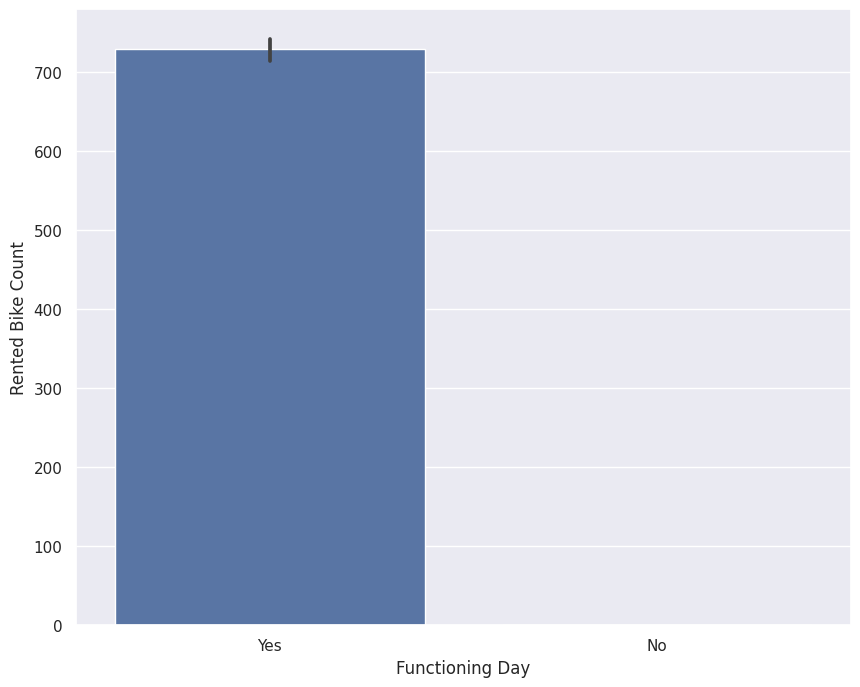

In [42]:
#plot Bar plot about Categorical Features
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.barplot(x=df[col], y=df["Rented Bike Count"])
  plt.show()

* According to bargraph, During **winter season demand of rental bike is less** in comparision to other seasons.
* **On working day**, the rental bikes **demand** is **high** in comparison to holiday.
* **Very high demand** of rentel bikes **on functioning day**, on the otherhand, no demand on non functioning day.

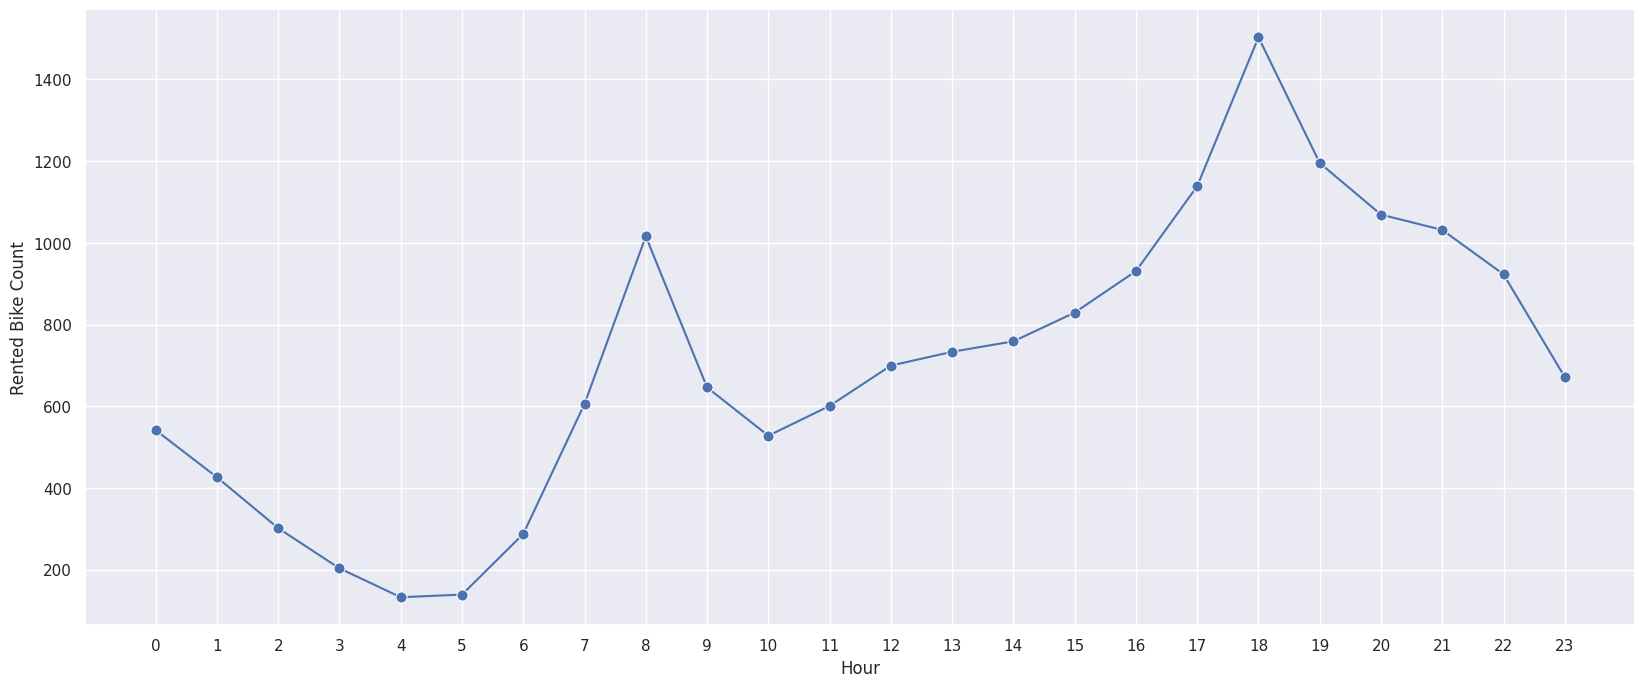

In [43]:
# Calculate average bikes rented per hour
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

# Plot the average rent over time (hours)
plt.figure(figsize=(20, 8))
sns.lineplot(data=avg_rent_hrs, x='Hour', y='Rented Bike Count',
             marker='o', markersize=8, color='b')
plt.xticks(avg_rent_hrs['Hour'])
plt.show()


##3. Multivariate Analysis

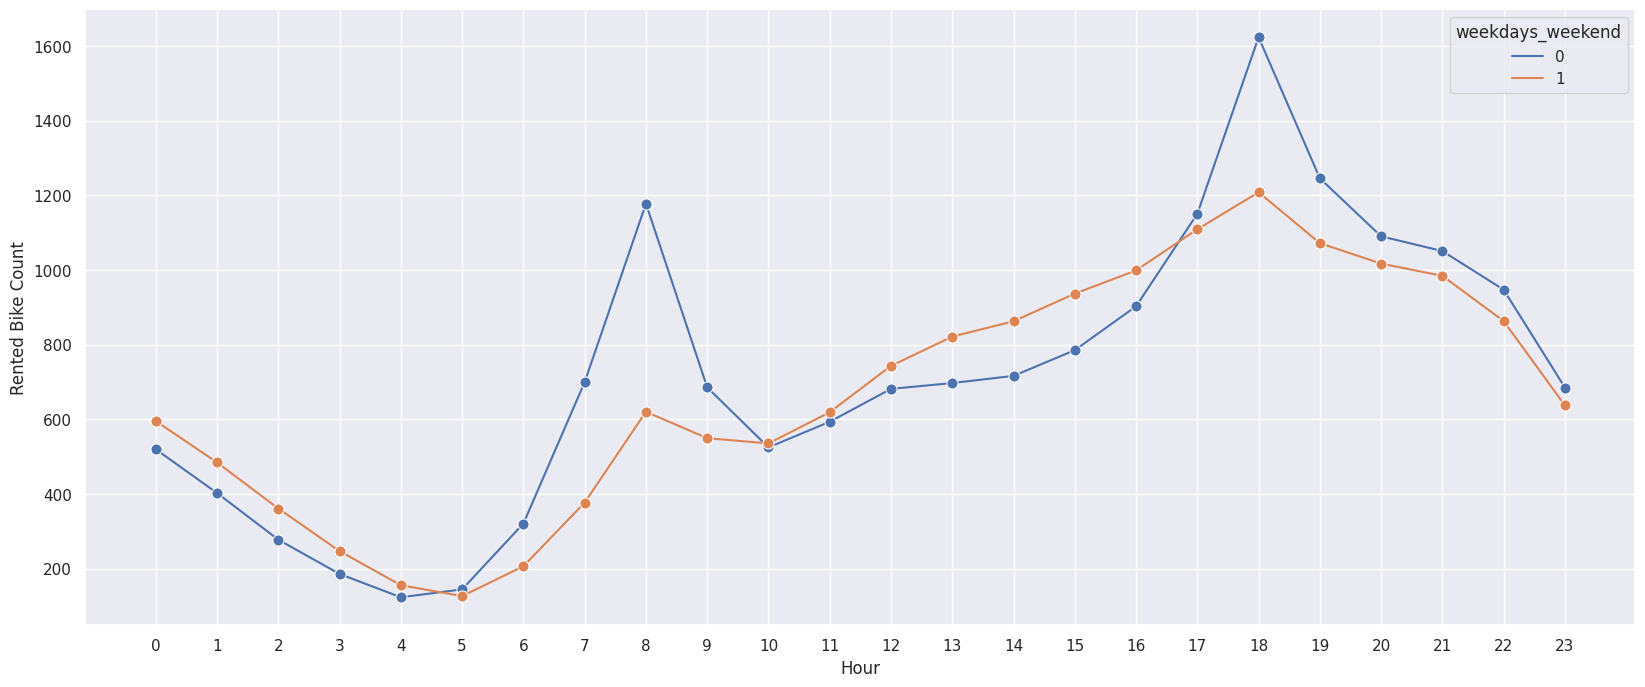

In [44]:
# Plot the average rent over time (hours)
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', marker='o',
             markersize=8, hue='weekdays_weekend', ci=None)
plt.xticks(avg_rent_hrs['Hour'])
plt.show()


* According to point plot, **weekdays (blue line)** shows **higher demand** of rented bikes, in comparison to weekends (orange line).
* **Peak demand** for rented bike in weekend and weekdays is **during 6pm (18:00)**.

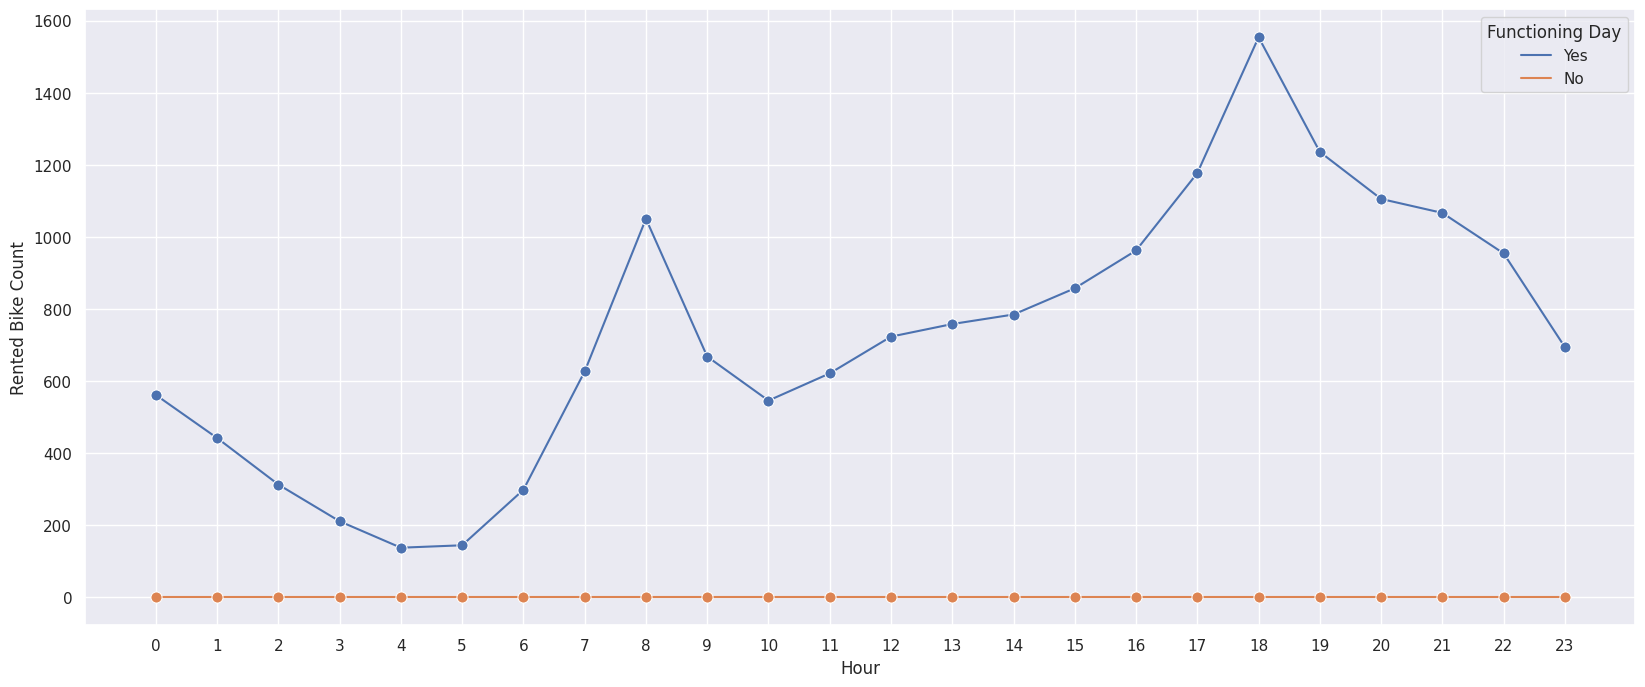

In [45]:
# Plot the average rent over time (hours)
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', marker='o',
             markersize=8, hue='Functioning Day', ci=None)
plt.xticks(avg_rent_hrs['Hour'])
plt.show()


* It clearly shows that, **Peoples do not use** reneted bikes **on** **no functioning day**.

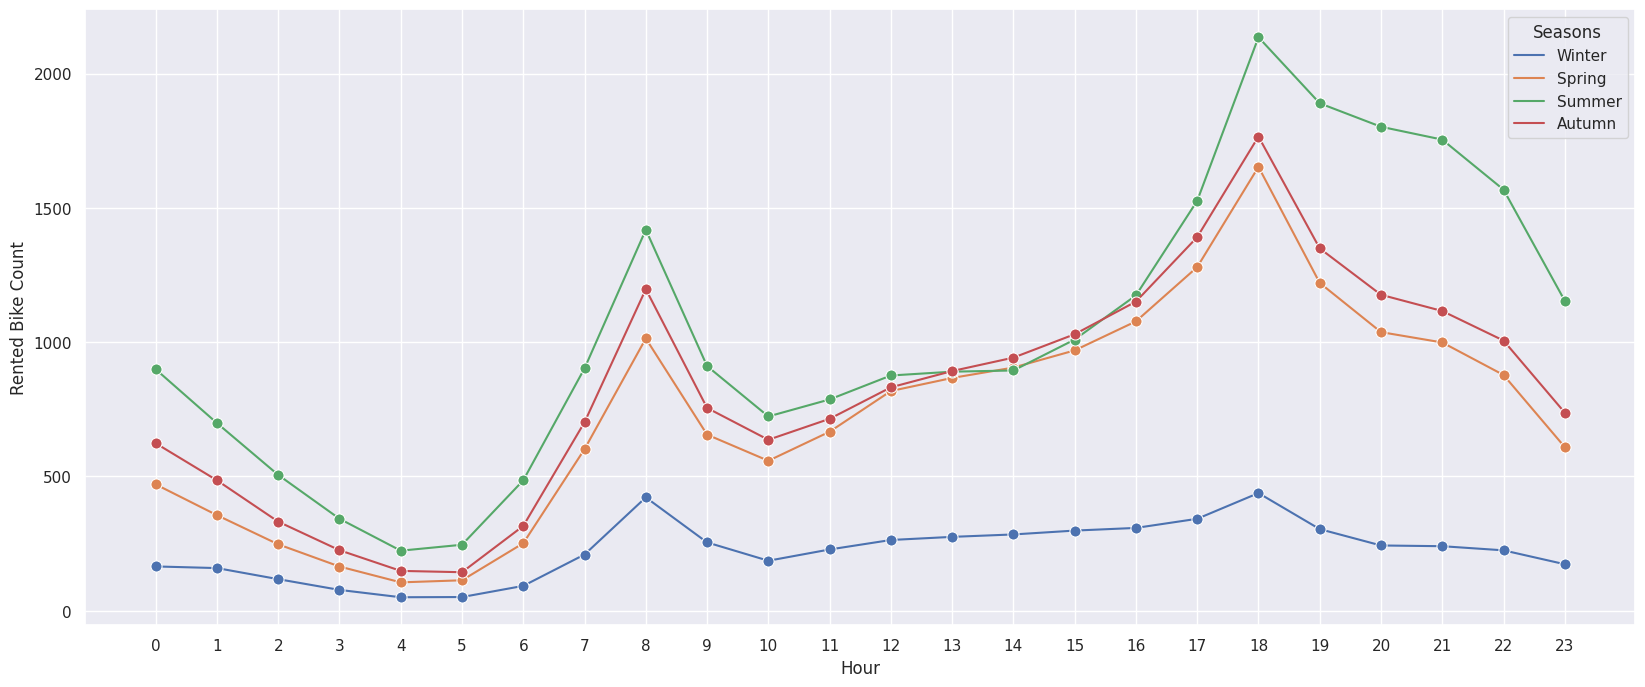

In [46]:
# Plot the average rent over time (hours)
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count',  marker='o',
             markersize=8, hue='Seasons', ci=None)
plt.xticks(avg_rent_hrs['Hour'])
plt.show()


* As per the graphs **Summer (in green)** is the **busiest season** in regards to rented bike demand.
* **Less demand** for rented bike **during winter season**, in comparison to other seasons.
* **Peak demand** for rented bike is **during 6pm (18:00)**.

## **Conclusion - EDA**

* According to the pie chart, **95.1%** of the data represent **working day** and **only 4.9%** of the data represent **holiday**.
* **very less non-functioning day** in **comparison of functioning day**
* According to the line chart, **highest demand** for the rented bike is seen **when** there is **moderate temperature** that is **around 25°C to 35°C**.
* From the above bar plot we can clearly say that in **month of June, there is high demand** for rental bikes.
* The **least demand** of rented bikes is seen in the months of **January and February.**
* it can be seen that generally people use rented bikes during their working hour from **7am to 9am and 5pm to 7pm.**
* According to above plots, **High temperature** leads to **increase in Rented Bike Count per hour**
* According to bargraph, During **winter season demand of rental bike is less** in comparision to other seasons.
* **On working day**, the rental bikes **demand** is **high** in comparison to holiday.
* **Very high demand** of rentel bikes **on functioning day**, on the otherhand, no demand on non functioning day.
* According to point plot, **weekdays (blue line)** shows **higher demand** of rented bikes, in comparison to weekends (orange line).
* **Peak demand** for rented bike in weekend and weekdays is **during 6pm (18:00)**.
* It clearly shows that, **Peoples do not use** reneted bikes **on** **no functioning day**.
* As per the graphs **Summer (in green)** is the **busiest season** in regards to rented bike demand.
* **Less demand** for rented bike **during winter season**, in comparison to other seasons.
* **Peak demand** for rented bike is **during 6pm (18:00)**.

#Encoding categorical columns

In [47]:
# Create a summary table for column information
column_info = {
    'Column': df.columns,
    'Dtype': df.dtypes,
    'nUnique': df.nunique(),
    'Unique': df.apply(lambda x: x.unique())
}

# Create a DataFrame from the summary information
df_columns = pd.DataFrame(column_info)

# Add indexing
df_columns = df_columns.reset_index(drop=True)

df_columns

Column    Dtype  nUnique  \
0         Rented Bike Count    int64     2166   
1                      Hour    int64       24   
2           Temperature(°C)  float64      546   
3               Humidity(%)    int64       90   
4          Wind speed (m/s)  float64       65   
5          Visibility (10m)    int64     1789   
6   Solar Radiation (MJ/m2)  float64      345   
7              Rainfall(mm)  float64       61   
8             Snowfall (cm)  float64       51   
9                   Seasons   object        4   
10                  Holiday   object        2   
11          Functioning Day   object        2   
12                    month    int64       12   
13         weekdays_weekend    int64        2   

                                               Unique  
0   [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...  
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
2   [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....  
3   [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...  
4   [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...  
5   [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...  
6   [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...  
7   [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...  
8   [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...  
9                    [Winter, Spring, Summer, Autumn]  
10                              [No Holiday, Holiday]  
11                                          [Yes, No]  
12            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
13                                             [0, 1]

* **3 columns (Seasons, Holiday and Functioning Day) can be encoded.**

In [48]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features, drop_first=True)
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [49]:
#concating numeric columns and dummy columns and creating final df
f_df= pd.concat([dummy_categorical_feature, numeric_features], axis=1)

f_df

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  \
0                       1                254     0             -5.2   
1                       1                204     1             -5.5   
2                       1                173     2             -6.0   
3                       1                107     3             -6.2   
4                       1                 78     4             -6.0   
...                   ...                ...   ...              ...   
8755                    1               1003    19              4.2   
8756                    1                764    20              3.4   
8757                    1                694    21              2.6   
8758                    1                712    22              2.1   
8759                    1                584    23              1.9   

      Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                         0.0           0.0            0.0      1   
1                         0.0           0.0            0.0      1   
2                         0.0           0.0            0.0      1   
3                         0.0           0.0            0.0      1   
4                         0.0           0.0            0.0      1   
...                       ...           ...            ...    ...   
8755                      0.0           0.0            0.0     11   
8756                      0.0           0.0            0.0     11   
8757                      0.0           0.0            0.0     11   
8758                      0.0           0.0            0.0     11   
8759                      0.0           0.0            0.0     11   

      weekdays_weekend  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
8755                 0  
8756                 0  
8757                 0  
8758                 0  
8759                 0  

[8760 rows x 16 columns]

In [50]:
#describing final DF
f_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Spring           8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer           8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter           8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday       8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes      8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count        8760.0   704.602055  644.997468   0.0  191.00   
Hour                     8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)          8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)              8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)         8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)         8760.0  1436.825799  608.298712  27.0  940.00   
Solar Radiation (MJ/m2)  8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)             8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)            8760.0     0.075068    0.436746   0.0    0.00   
month                    8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend         8760.0     0.290411    0.453978   0.0    0.00   

                             50%      75%      max  
Seasons_Spring              0.00     1.00     1.00  
Seasons_Summer              0.00     1.00     1.00  
Seasons_Winter              0.00     0.00     1.00  
Holiday_No Holiday          1.00     1.00     1.00  
Functioning Day_Yes         1.00     1.00     1.00  
Rented Bike Count         504.50  1065.25  3556.00  
Hour                       11.50    17.25    23.00  
Temperature(°C)            13.70    22.50    39.40  
Humidity(%)                57.00    74.00    98.00  
Wind speed (m/s)            1.50     2.30     7.40  
Visibility (10m)         1698.00  2000.00  2000.00  
Solar Radiation (MJ/m2)     0.01     0.93     3.52  
Rainfall(mm)                0.00     0.00    35.00  
Snowfall (cm)               0.00     0.00     8.80  
month                       7.00    10.00    12.00  
weekdays_weekend            0.00     1.00     1.00

# **Model Building**

## **Splitting, Scaling, Function creation**

Before we move modeling part we has to scale our dataset

In [51]:
# Splitting data
X = f_df.drop(['Rented Bike Count'], axis=1)
y = np.sqrt(f_df['Rented Bike Count'])

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

# Scaling data
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [52]:
# Function create
def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((len(X_test_scaled) - 1) /
                          (len(X_test_scaled) - X_test_scaled.shape[1] - 1))

    # Print evaluation metrics
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)
    print("Adjusted R2:", adj_r2)

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_pred[:100])
    plt.plot(np.array(y_test)[:100])
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual vs. Predicted Bike Counts')

    return model

In [53]:
# model has feature importances, plot them
def get_features_importance (optimal_model,X_train):
    feature_importances = optimal_model.feature_importances_
    feature_names = X.columns
    sorted_indices = np.argsort(feature_importances)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
    plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Horizontal Barplot)')

    plt.show()

## **Linear Regression**

MSE: 52.48814499667346
RMSE: 7.244870253957172
R2: 0.6573503072024729
Adjusted R2: 0.6549861188897025


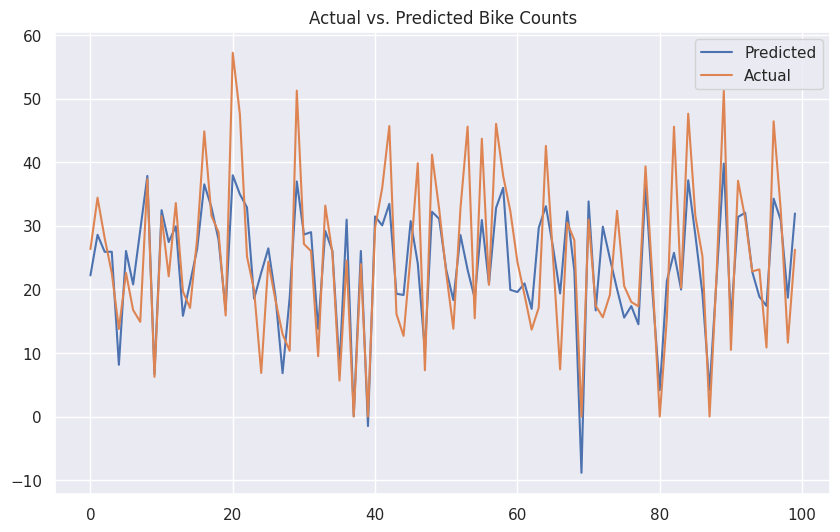

In [54]:
# Initialize Linear Regression model
linear_model = LinearRegression()

# Evaluate Linear Regression model
lr_result_model = evaluate_model(linear_model, X_train_scaled, y_train, X_test_scaled, y_test)

## **Lasso Regression**

MSE: 52.50783682402863
RMSE: 7.246229145150505
R2: 0.6572217562964675
Adjusted R2: 0.6548566810179243


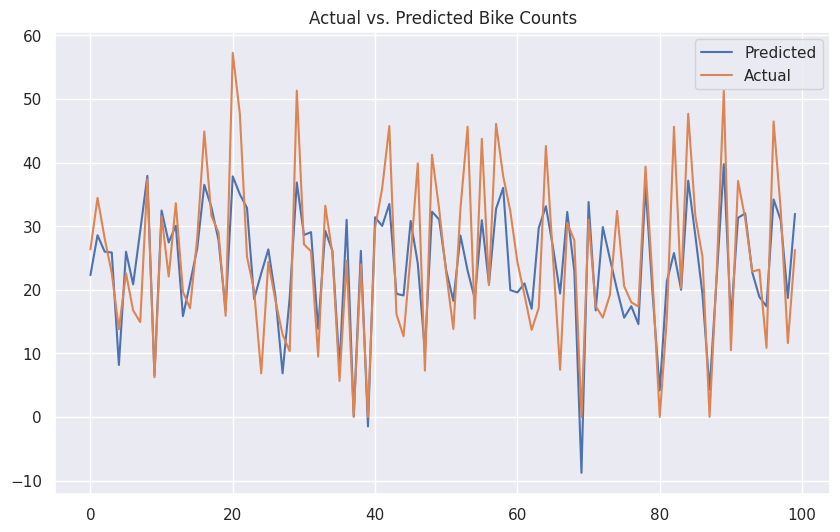

In [55]:
# Initialize and evaluate Lasso Regression model
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_result_model = evaluate_model(lasso_grid, X_train_scaled, y_train, X_test_scaled, y_test)

##**Ridge Regression**

MSE: 52.49861420585303
RMSE: 7.245592743582338
R2: 0.6572819627923316
Adjusted R2: 0.6549173029219936


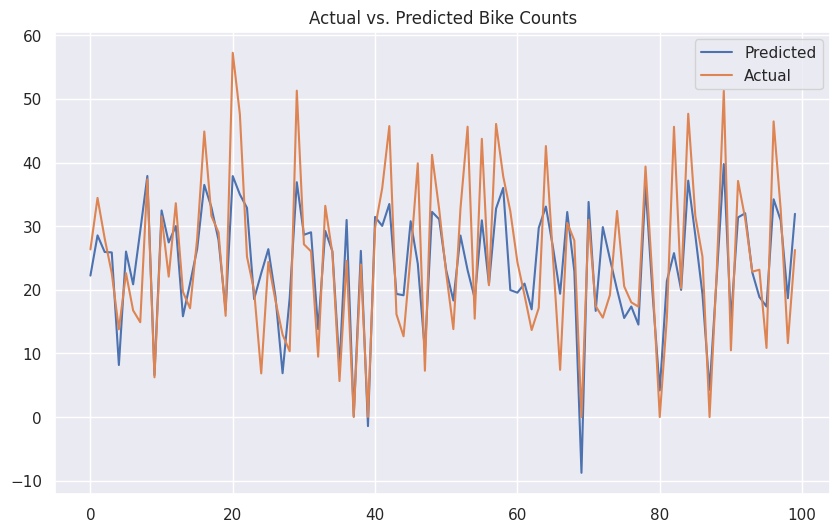

In [56]:
# Initialize and evaluate Ridge Regression model
ridge_model = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_grid = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_result_model = evaluate_model(ridge_grid, X_train_scaled, y_train, X_test_scaled, y_test)


##**Decision Tree**

MSE: 23.344448874168762
RMSE: 4.8316093461877445
R2: 0.8476042878678899
Adjusted R2: 0.8465527995137125


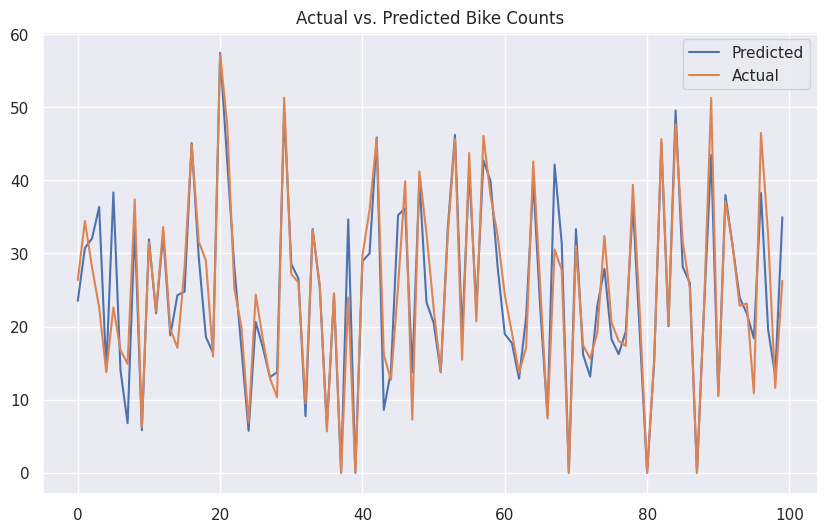

In [57]:
# Initialize and evaluate Decision Tree model
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()
decision_tree_result_model = evaluate_model(decision_tree_model, X_train_scaled, y_train, X_test_scaled, y_test)


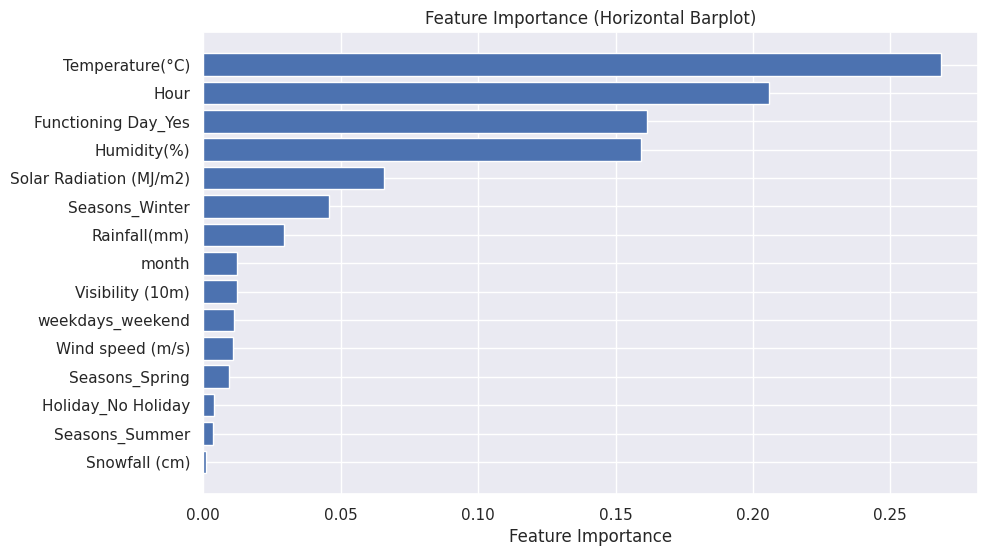

In [58]:
#getting features importance of decision tree
get_features_importance(decision_tree_model, X)

##**Random Forest**

MSE: 18.465922626471084
RMSE: 4.297199393380657
R2: 0.879451965475552
Adjusted R2: 0.8786202173072601


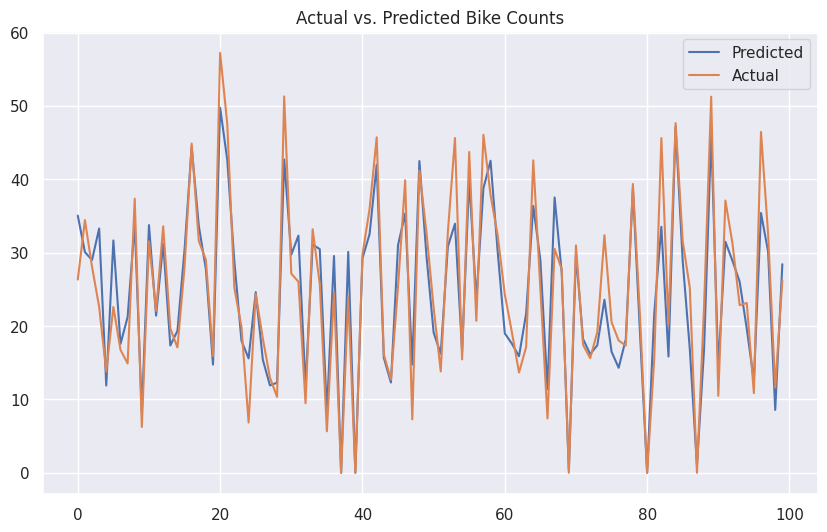

In [59]:
# Initialize and evaluate Random Forest model
random_forest_model = RandomForestRegressor()

params = {'n_estimators': [60,80,100],
          'max_depth': [15,20] ,
          'max_leaf_nodes': [40,60,80]}

rf_grid = GridSearchCV(random_forest_model, param_grid=params, verbose=0)
random_forest_result_model = evaluate_model(rf_grid, X_train_scaled, y_train, X_test_scaled, y_test)


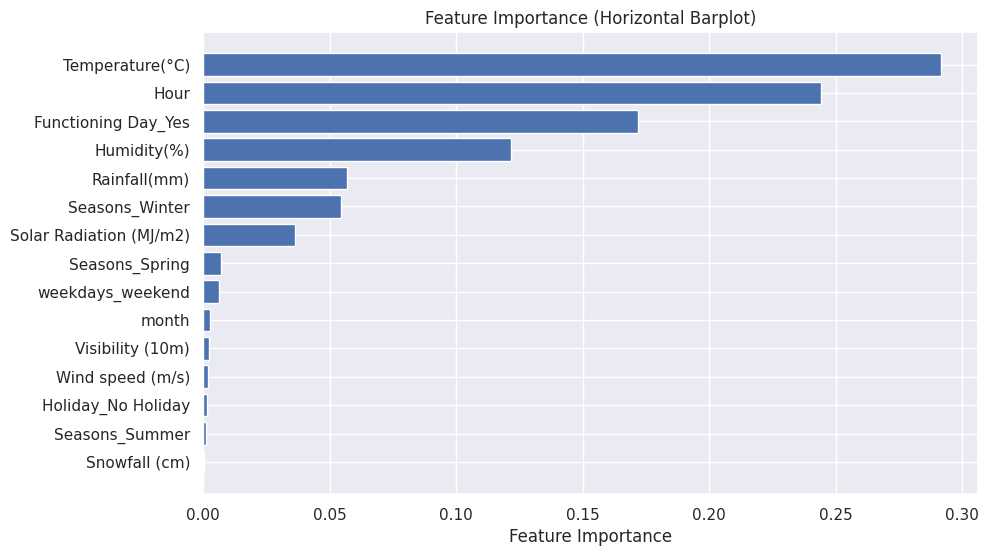

In [60]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model, X)

##**Gradient Boosting**

MSE: 14.500586210258446
RMSE: 3.8079635253319384
R2: 0.9053382166459872
Adjusted R2: 0.9046850764664517


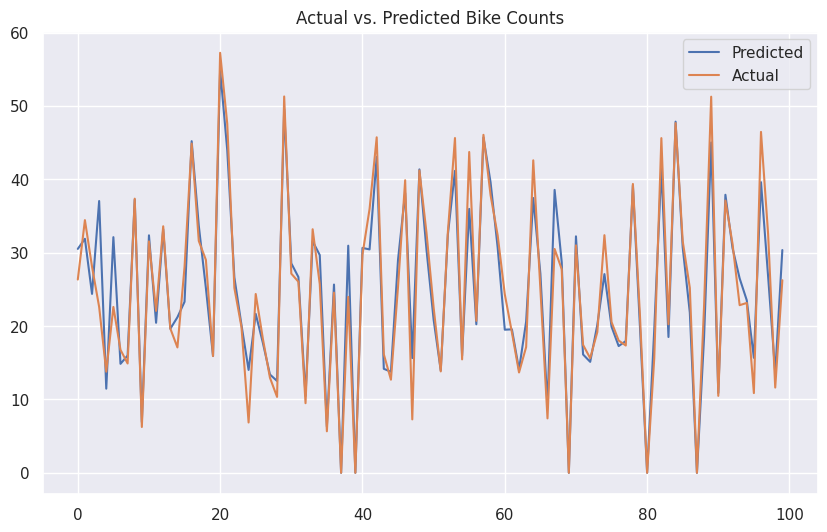

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and evaluate Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

params = {'n_estimators':[80,100,150],
          'max_depth':[15,20,30] }

gb_grid = GridSearchCV(gradient_boosting_model, param_grid=params,verbose=0)

gradient_boosting_result_model = evaluate_model(gb_grid, X_train_scaled, y_train, X_test_scaled, y_test)


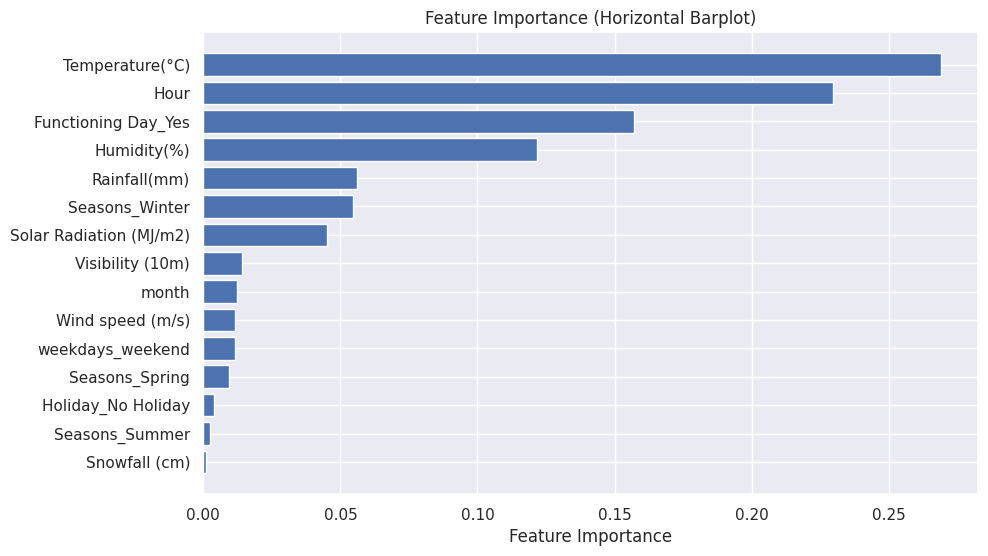

In [62]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model, X)

##**eXtreme Gradient Boosting**

MSE: 13.107744898516218
RMSE: 3.620461973079709
R2: 0.9144308726660166
Adjusted R2: 0.9138404693035467


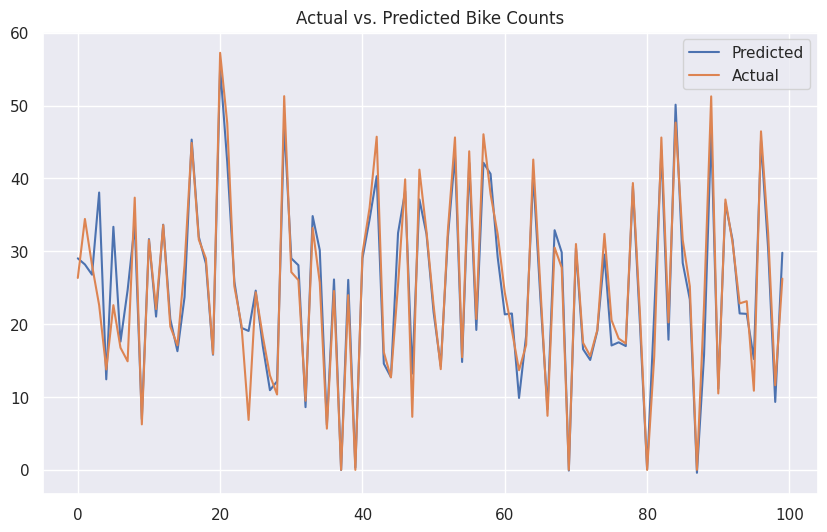

In [63]:
# Initialize and evaluate eXtreme Gradient Boosting (XGBoost) model
xgb_model = XGBRegressor()

params = {'n_estimators':[80,100,150],'max_depth':[15,20,30]}
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

xgb_result_model = evaluate_model(xgb_grid, X_train_scaled, y_train, X_test_scaled, y_test)

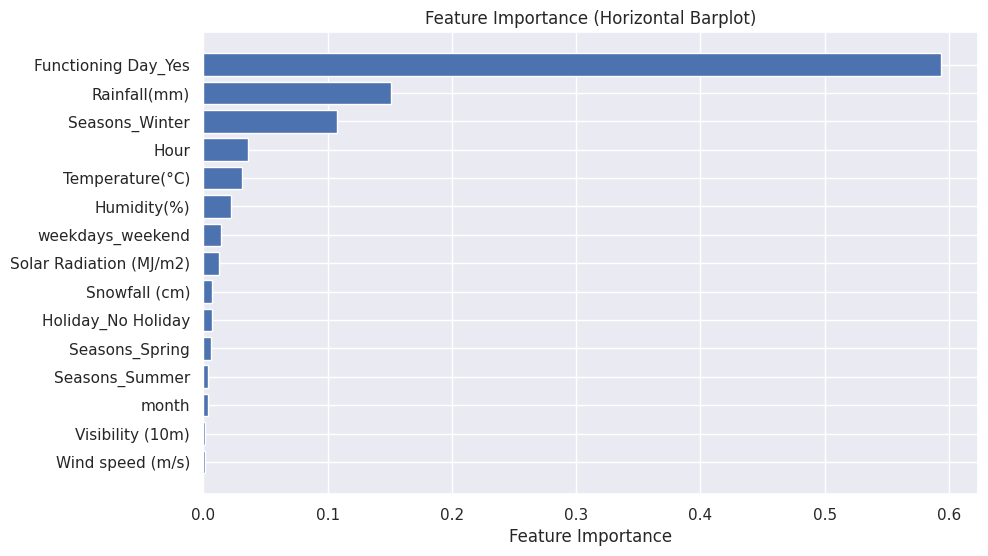

In [64]:
# getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model, X)

# Conclusion - Regression Model

* According to **Decision tree, random forest and Gradient Boosting** tests, **temperature** is the **most important feature** and has the highest impact on rented bike demand.

* As per **eXtreme Gradient Boosting** model, **Functional day** is the **most important feature** and has the highest impact on rented bike demand.

* **On the basis of R2 and Adjusted-R2**, **Gradient Boosting model and eXtreme Gradient Boosting model are best** as the **accuracy** of these models are **above 90%** and also their Adjusted-R2 values are less than R2 values.

* **Linear** model, **Lasso** model and **Ridge model** have **Adjusted-R2 value below 70%**.